# Linear Discriminant Analysis (LDA)

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [2]:
pd.options.display.max_columns = None

## Load data into dataframe

In [3]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
X, y = df_wine.iloc[:, 1:], df_wine.iloc[:, 0]

## LDA

In [5]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, y)

In [6]:
lda.explained_variance_ratio_

array([0.68747889, 0.31252111])

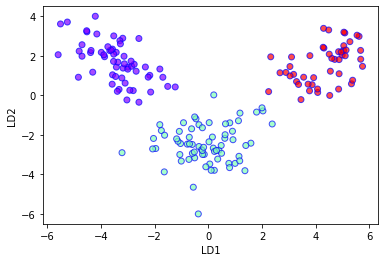

In [7]:
plt.xlabel('LD1')
plt.ylabel('LD2')

plt.scatter(
    X_lda[:,0],
    X_lda[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)
plt.show()

## LDA vs PCA

In [8]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X, y)

In [9]:
pca.explained_variance_ratio_

array([0.99809123, 0.00173592])

As we can see, PCA selected the components which would result in the highest spread (retain the most information) and not necessarily the ones which maximize the separation between classes.

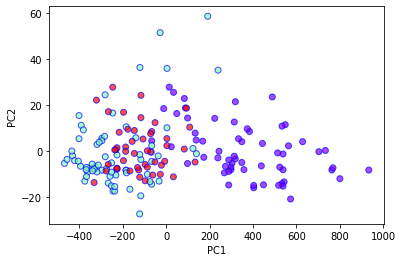

In [10]:
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=y,
    cmap='rainbow',
    alpha=0.7,
    edgecolors='b'
)

plt.show()

## Classifier

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=41)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(124, 2) (124,)
(54, 2) (54,)


In [12]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

confusion_matrix(y_test, y_pred)

array([[16,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 20]])

Decision Tree classifier is able to predict accurately each and every class.